In [1]:
%matplotlib inline

# Assignment 1

**DUE: Monday, January 23rd 2023 at 5:00pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. To do so, restart the kernel and run all cells (in the menubar, select Runtime→→Restart and run all).
#### Show your work!
Whenever you are asked to find the solution to a problem, be sure to also **show how you arrived** at your answer.

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWERS HERE", as well as your name below:



In [2]:
NAME = "Sathyaprakash Narayanan"
STUDENT_ID = "2005873"

## Problem 1

![figure](https://docs.google.com/drawings/d/e/2PACX-1vR3cNeZWfHNbPXRGyZrKazhI2WNM9wroJoAsshbD7LzwEBd4k0W_zu-T30_O_4iHC2qpKRxCRBA1IjV/pub?w=480&h=320)

Which solution would the following search algorithms find to move from node *Start* to node *Goal* if run the algorithm on the search graph above? Break any ties alphabetically.

a. Breadth-First Search

b. Depth-First Search

c. Uniform Cost Search

Explain by drawing an equivalent search tree for each of them. Draw the search trees graphically. A good way to do this is through [Google Drawings](https://docs.google.com/drawings)

[YOUR ANSWERS HERE]

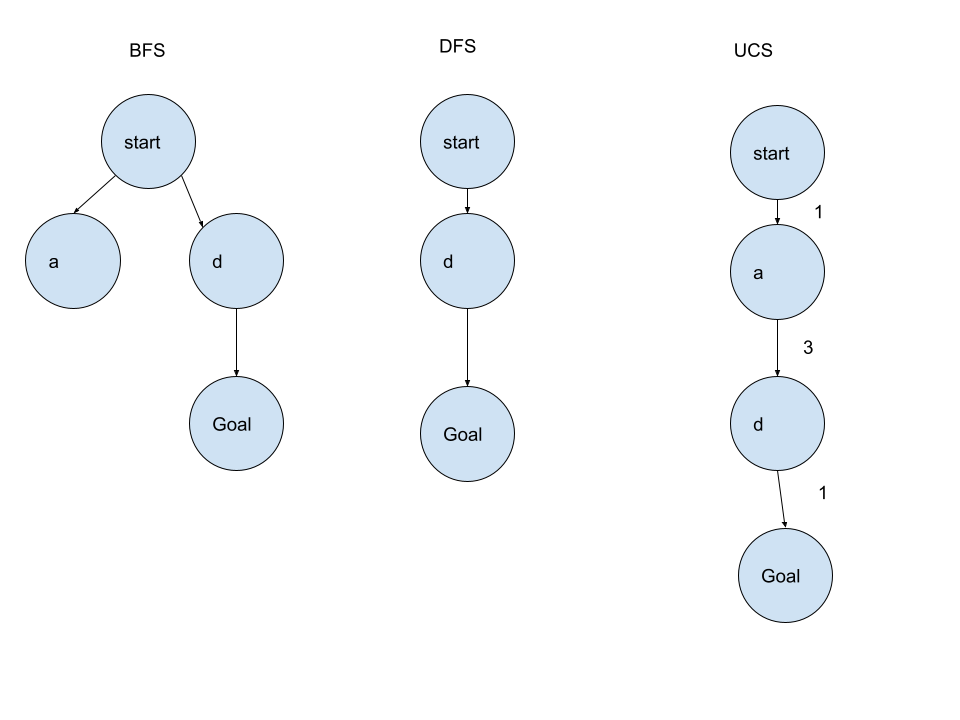


## Problem 2
Answer the following questions about the search problem shown in the figure below. Break any ties alphabetically. For the questions that ask for a path, please give your answers in a form similar to this example, 

Start − a − d − Goal

![figure](https://docs.google.com/drawings/d/e/2PACX-1vS4nUoOVGzXNZTHZLsY6wZ6VyjtPlA4mhcvWs-6mgwaeDwoMftqbYyytgBVmgOnqLoUGZbRt8cuQNfA/pub?w=640&h=480)

What path would be returned for this search problem using each of the following graph search algorithms?

a. Breadth-First Search

b. Uniform Cost Search

c. Depth-First Search

d. A* Search (using an appropriate heuristic function). Explain what heuristc function you used.



Consider the heuristics for this problem shown in the table below.

|     State     |     h1     |     h2        |
|---------------|------------|---------------|
|     start     |     5      |     4         |
|     a         |     3      |     2         |
|     b         |     6      |     6         |
|     c         |     2      |     1         |
|     d         |     3      |     3         |
|     goal      |     0      |     0         |


e. Is h1 consistent?

f. Is h2 consistent?

[YOUR ANSWERS HERE]

a. Start -> A -> Goal

c. Start -> A -> B -> D -> Goal

b. Start -> A -> C -> D-> Goal.  [Total Cost : 1+1+1+3 = 6]

d. Preferred H2 since its more optimal to find the Goal Node

start -> a -> (3) 
start -> a -> b (10)
start -> a -> c (3)
start -> a -> b -> d (10)
start -> a ->c -> Goal (4)
e. H1 is consistent

f. H2 is also consistent


##Problem 3

![graph](https://docs.google.com/drawings/d/e/2PACX-1vStncj9Nc0LddQeViaYnykNxEZsJoYJMHhub2LLX8s7k7gwYjlnlt0cCcivymFihiZyOOMtHwzk1Z4G/pub?w=480&amp;h=320)

Find the order of visited nodes of the given graph above using both Breadth-first Search (BFS) (Textbook Section 3.4.1) and Depth-First Search (DFS) (Textbook Section 3.4.3).

A Node class is given to you for creating the graph.

**NOTE:**
 - If two nodes are considered equally good chocices, take the node with the lower ID first. 
 - Do not revisit already explored nodes when implementing the DFS algorithm.



In [179]:
class Node:
    """
    This class describes a single node contained within a graph. 
    It has the following instannce level attributes:
    
    ID: An integer id for the node i.e. 1
    """    
    def __init__(self, ID):
        self.ID = ID
        self.connected_nodes = []
        
    def __repr__(self):
        ID = self.ID
        if len(self.connected_nodes)==0:
            nodes = 'None'
        else:
            nodes = ','.join(str(cn[1].ID) for cn in self.connected_nodes)
        return '\nNode:{}\nConnected Nodes:{}'.format(ID, nodes)
        
    def set_connected_nodes(self,connected_nodes):
        """
        Adds edges that lead from this node to other nodes:
        
        Parameters:
        - connected_nodes: A list of tuples consisting of (cost, Node), 
                           where 'cost' is a floating point value 
                           indicating the cost to get from this node 
                           to 'Node' and 'Node' is a Node object
        """
        self.connected_nodes = connected_nodes
    
def build_graph():
    """
    Builds the graph to be parsed by the search algorithms.
    Returns: All nodes with connectivity in the graph
    """
    ids = range(13)
    coords = [(0,0), (1,1), (1,0), (1,1), (5,2), (3,1), (3,0), 
              (3,-1), (5,1), (4,1), (4,0), (4,-2), (7,0)]
    
    #https://en.wikipedia.org/wiki/Euclidean_distance
    euclidean_distance = lambda x1y1, x2y2: ((x1y1[0]-x2y2[0])**2 +  (x1y1[1]-x2y2[1])**2)**(0.5)
    
    def build_connected_node_list(from_id, to_ids):
        starting_coords = coords[from_id]
        
        connected_nodes = []
        for to_id in to_ids:
            connected_nodes.append((euclidean_distance(starting_coords, coords[to_id]), all_nodes[to_id]))
            
        return connected_nodes
    
    goal_coords = (7,0)
    all_nodes = [Node(_id) for _id in ids]
    
    all_nodes[8].set_connected_nodes(build_connected_node_list(8, [12]))
    all_nodes[10].set_connected_nodes(build_connected_node_list(10,[12]))
    all_nodes[5].set_connected_nodes(build_connected_node_list(5, [8]))
    all_nodes[6].set_connected_nodes(build_connected_node_list(6, [9, 10]))
    all_nodes[7].set_connected_nodes(build_connected_node_list(7, [11]))
    all_nodes[1].set_connected_nodes(build_connected_node_list(1, [4,5]))
    all_nodes[2].set_connected_nodes(build_connected_node_list(2, [5,6]))
    all_nodes[3].set_connected_nodes(build_connected_node_list(3, [7]))
    all_nodes[0].set_connected_nodes(build_connected_node_list(0, [1,2,3]))
    
    return all_nodes

In [180]:
# The starting node. You can use this cell to familiarize
# yourself with the node/graph structure
build_graph()

[
 Node:0
 Connected Nodes:1,2,3, 
 Node:1
 Connected Nodes:4,5, 
 Node:2
 Connected Nodes:5,6, 
 Node:3
 Connected Nodes:7, 
 Node:4
 Connected Nodes:None, 
 Node:5
 Connected Nodes:8, 
 Node:6
 Connected Nodes:9,10, 
 Node:7
 Connected Nodes:11, 
 Node:8
 Connected Nodes:12, 
 Node:9
 Connected Nodes:None, 
 Node:10
 Connected Nodes:12, 
 Node:11
 Connected Nodes:None, 
 Node:12
 Connected Nodes:None]

In [187]:
def BFS(starting_node, goal_node):
    """
    This function implements the breath first search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited nodes in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []
    # YOUR CODE HERE

    # for id in starting_node.connected_nodes:
    #   if(isinstance(id,tuple)):
    #     node_id = id[1].ID
    #   else:
    #     node_id = id.ID
    #   # print(node_id)
      
      
    #   if(node_id == goal_node):
    #     # connected_nodes = id.connected_nodes
    #     if(node_id not in visited_nodes_in_order):
    #       visited_nodes_in_order.append(node_id)
    #   elif(len(id[1].connected_nodes)>0):
    #     connected_nodes = id[1].connected_nodes
    #     for internal_node in connected_nodes:
    #       internal_node_id = internal_node[1].ID
    #       if(internal_node_id not in visited_nodes_in_order):
    #         visited_nodes_in_order.append(internal_node_id)
    # print(visited_nodes_in_order)
    # return visited_nodes_in_order
   





     #######
    visited_nodes_in_order.append(starting_node.ID)
    queue = build_graph()
    while queue:         
      m = queue.pop(0)

      if(isinstance(m,tuple)):
        m_id = m[0]
      else:
        m_id = m.ID
      if( m_id == goal_node):     # Check if the node has reach the goal_node or not

        if(m_id not in visited_nodes_in_order):  #TODO: Maybe use a set to avoid this
          visited_nodes_in_order.append(m.ID)
        break
      

      if(len(m.connected_nodes)>0):
        for neighbour in m.connected_nodes:
          if neighbour[1].ID not in visited_nodes_in_order:
    
            visited_nodes_in_order.append(neighbour[1].ID)
            queue.append(neighbour)
    return visited_nodes_in_order
      





    raise NotImplementedError()
    
    # return visited_nodes_in_order

def istuple(node):
  # ipdb.set_trace()
  node_id = node[0]
  node = node[1]
  
  return node, node_id

def iteration(node, visited_nodes_in_order, goal_node):
    visited_nodes_in_order = []
    if(isinstance(node,tuple)):
      node_id, node = istuple(node)
    else:
      node_id = node.ID
    if(node_id == goal_node):
      if(node_id not in visited_nodes_in_order):
      
        visited_nodes_in_order.append(node_id)
        print(visited_nodes_in_order)
        return visited_nodes_in_order
    
    if(len(node.connected_nodes)>0):
      for node in node.connected_nodes:
        if(isinstance(node,tuple)):
          node_id, node = istuple(node)

        if(node_id not in visited_nodes_in_order):
          visited_nodes_in_order.append(node_id.ID)
          iteration(node_id)
flag =1
def DFS(starting_node, goal_node):
    """
    This function implements the depth first search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited nodes in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []
    
    # YOUR CODE HERE
   
    def rec(node):
      global flag
      for i in node.connected_nodes:
        new_node = i[1]
        if(flag):
          if(new_node.ID == goal_node):
            flag =0
          if(len(new_node.connected_nodes)>0):
            if(goal_node in new_node.connected_nodes):
              visited_nodes_in_order.append(goal_node)
            else:
              visited_nodes_in_order.append(new_node.ID)
              rec(new_node)
          else:
            visited_nodes_in_order.append(new_node.ID)
     

    visited_nodes_in_order.append(starting_node.ID) #Initial Node
    for i in starting_node.connected_nodes:         #Tree Search 
      node = i[1]
      if(flag):
        # print(node.ID)
        visited_nodes_in_order.append(node.ID)
        if(len(node.connected_nodes)>0):
          rec(node)
    # print(visited)x/
    # visited_nodes_in_order.append(starting_node.ID)
    # def iteration(node):

    #   if(isinstance(node,tuple)):
    #     node_id, node = istuple(node)
    #   else:
    #     node_id = node.ID
     
      
    #   if(len(node.connected_nodes)>0):
    #     for node in node.connected_nodes:
    #       if(isinstance(node,tuple)):
    #         node_id, node = istuple(node)
    #       if(node_id.ID == goal_node):
    #         print("A")
    #         visited_nodes_in_order.append(goal_node)
            
    #         go to
            

    #       # elif(goal_node in node_id.connected_nodes ):
    #       #   print("B")
    #       #   visited_nodes_in_order.append(goal_node)
    #       #   break 
            

          
    #       elif(node_id not in visited_nodes_in_order): 
    #         visited_nodes_in_order.append(node_id.ID)
    #         iteration(node_id)
    #   return
            
          
    # iteration(starting_node)
    return visited_nodes_in_order
    raise NotImplementedError()
    


In [188]:
goal_node = 12

print(BFS(build_graph()[0], goal_node))

print(DFS(build_graph()[0], goal_node))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 4, 5, 8, 12]


## Problem 4

For the same graph from **Problem 3**, implement the **A* Search** (Textbook Section 3.5.2) algorithm.

A modified Node class similar to the Node class from **Problem 3** is given to create the graph. 
Here is  the pseudo code from the book for A* Search.

#### A* Search
---
The most widely known form of best-first search is called **A∗ search** (pronounced "A-star search"). It evaluates nodes by combining $g(n)$, the cost to reach the node, and $h(n)$, the cost to get from the node to the goal:

\begin{equation*}
f(n) = g(n) + h(n) .
\end{equation*}

Since $g(n)$ gives the path cost from the start node to node $n$, and $h(n)$ is the estimated cost of the cheapest path from n to the goal, we have


$f(n)$= estimated cost of the cheapest solution through $n$ .

**NOTE:**
- If two nodes are considered equally good choices, take the node with the lower ID first. 


In [162]:
class Node:
    """
    This class describes a single node contained within a graph. 
    It has the following instannce level attributes:
    
    ID: An integer id for the node i.e. 1
    heuristic_cost: A float value representing the estimated 
                    cost to the goal node
    """    
    def __init__(self, ID, heuristic_cost):
        self.ID = ID
        self.connected_nodes = []
        self.heuristic_cost = heuristic_cost
        
    def __repr__(self):
        ID = self.ID
        hx = self.heuristic_cost
        if len(self.connected_nodes)==0:
            nodes = 'None'
        else:
            nodes = ','.join(str(cn[1].ID) for cn in self.connected_nodes)
        return 'Node:{}\nh(n):{}\nConnected Nodes:{}'.format(ID, hx, nodes)
        
    def set_connected_nodes(self,connected_nodes):
        """
        Adds edges that lead from this node to other nodes:
        
        Parameters:
        - connected_nodes: A list of tuples consisting of (cost, Node), 
                           where 'cost' is a floating point value 
                           indicating the cost to get from this node 
                           to 'Node' and 'Node' is a Node object
        """
        self.connected_nodes = connected_nodes
    
def build_graph():
    """
    Builds the graph to be parsed by the search algorithms.
    Returns: The starting node, which is the entry point into the graph
    """
    ids = range(13)
    coords = [(0,0), (1,1), (1,0), (1,1), (5,2), (3,1), (3,0), 
              (3,-1), (5,1), (4,1), (4,0), (4,-2), (7,0)]
    
    #https://en.wikipedia.org/wiki/Euclidean_distance
    euclidean_distance = lambda x1y1, x2y2: ((x1y1[0]-x2y2[0])**2 +  (x1y1[1]-x2y2[1])**2)**(0.5)
    
    def build_connected_node_list(from_id, to_ids):
        starting_coords = coords[from_id]
        
        connected_nodes = []
        for to_id in to_ids:
            connected_nodes.append((euclidean_distance(starting_coords, coords[to_id]), all_nodes[to_id]))
            
        return connected_nodes
    
    goal_coords = (7,0)
    all_nodes = [Node(_id, euclidean_distance(coord, goal_coords)) for _id, coord in zip(ids, coords)]
    
    all_nodes[8].set_connected_nodes(build_connected_node_list(8, [12]))
    all_nodes[10].set_connected_nodes(build_connected_node_list(10,[12]))
    all_nodes[5].set_connected_nodes(build_connected_node_list(5, [8]))
    all_nodes[6].set_connected_nodes(build_connected_node_list(6, [9, 10]))
    all_nodes[7].set_connected_nodes(build_connected_node_list(7, [11]))
    all_nodes[1].set_connected_nodes(build_connected_node_list(1, [4,5]))
    all_nodes[2].set_connected_nodes(build_connected_node_list(2, [5,6]))
    all_nodes[3].set_connected_nodes(build_connected_node_list(3, [7]))
    all_nodes[0].set_connected_nodes(build_connected_node_list(0, [1,2,3]))
    
    return all_nodes[0]

In [163]:
# The starting node. You can use this cell to familiarize
# yourself with the node/graph structure
build_graph()

Node:0
h(n):7.0
Connected Nodes:1,2,3

In [159]:
def a_star_search(starting_node, goal_node):
    """
    This function implements the A* search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited node ids in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []
    
    # YOUR CODE HERE
    # starting_node = starting_node[0]
    if not starting_node:
        print("The graph is empty")
        return visited_nodes_in_order

    openSet = set()
    openSet.add(starting_node)
    closedSet = set()
    g = {}
    g[starting_node] = 0
    parents = {}
    parents[starting_node] = starting_node
    while len(openSet)>0:

      # print(len(openSet))
      n = None
      """checking cost to choose the optimal path"""
      for v in openSet:
          if n == None or g[v]+ v.heuristic_cost < g[n]+ n.heuristic_cost:
              n = v
              nodeType = type(n)
              if nodeType == type(starting_node):
                  weightn, n = 0, n
              if nodeType != type(starting_node):
                  weightn, n = n[0], n[1]      
      if n == None:
          return "No path found"
    
      """Building the path based on the updated parent dictionary"""
      if n.ID == goal_node:
          while parents[n]!=n:
              visited_nodes_in_order.append(n.ID)
              n = parents[n]
          visited_nodes_in_order.append(starting_node.ID)
          visited_nodes_in_order.reverse()
          # return visited_nodes_in_order
          break
    
      for m in n.connected_nodes:
          nodeType = type(m)
          if nodeType == type(starting_node):
              weightm, m = 0, m
          if nodeType != type(starting_node):
              weightm, m = m[0], m[1]
            
          """adding each visited node to the sets to explore the neighbours"""
          if m not in openSet and m not in closedSet:
              openSet.add(m)
              parents[m] = n
              g[m] = g[n]+weightm
            
            
              """updating the distance and weights of shortest path if the previous values are high.
              Removing mth node from the closedSet since its neighbours have to be explored and adding it to openSet"""
          else:
              if g[m]>g[n]+weightm:
                  g[m] = [n]+weightm
                  parents[m] = n

                  if m in closedSet:
                      closedSet.remove(m)
                      openSet.add(m)
    raise NotImplementedError()
    
    return visited_nodes_in_order

In [171]:
goal_node = 12

a_star_search_answer = [0, 2, 6, 10, 12]

assert a_star_search(build_graph(), goal_node)==a_star_search_answer

## Problem 5

**Question 3.8 of the textbook**: In section 3.1 we made an assumption that edge costs are all non-negative and therefore we would not consider problems with negative path costs.

a. Suppose that actions can have arbitrarily large negative costs; explain why this possibility would force any optimal algorithm to explore the entire state space.

b. Does it help if we insist that step costs must be greater than or equal to some negative constant c? Consider both trees and graphs.

c. Suppose that a set of actions forms a loop in the state space such that executing the set in some order results in no net change to the state. If all of these actions have negative cost, what does this imply about the optimal behavior for an agent in such an environment?

d. One can easily imagine actions with high negative cost, even in domains such as route finding. For example, some stretches of road might have such beautiful scenery as to far outweigh the normal costs in terms of time and fuel. Explain, in precise terms, within the context of state-space search, why humans do not drive around scenic loops indefinitely, and explain how to define the state space and actions for route finding so that artificial agents can also avoid looping.

e. Can you think of a real domain in which step costs are such as to cause looping?


YOUR ANSWERS HERE

a.  By notion, since we explore nodes in order of increasing path cost, we’re guaranteed to find the lowest-cost path to a goal state. The strategy employed in UCS or A* considers the least cost to traverse to the goal state, having negative edge costs in our graph can make nodes on a path have decreasing length, ruining our guarantee of optimality. In other words, Arbitrarily big negative costs automaticaly creates a concurent for optimal solution.

b. In case of trees If we find the optimal solution with cost OC we don't need to consider sutree with costs greater or equal to OC + |D * P| where d is depth of tree because D steps with price P will produce the cost wich is greater than OC.

With respeect to graphs it wouldn't help because we can create loop with which summary cost will be negative.

c. Since the cost function value would decresase along the time, it is necessary to continue looping

d. It boils down to the fact how much resource a human has at his/her disposal. Since infinite resource would end up in a infinite loop, we can expland out states with few paramters (eg. fuel, time for sighseeing, money, etc...) and some reward minimization as we go deeper into the search to avoid an infinite loop.

e. Brush Teeth ( To cleanse mouth and have food ) -> Eat Food  => Brush Teeth because you had food. A Endless loop of eating and burshing teeth.